# PRINCIPAL COMPONENT ANALYSIS

Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

# Before understanding PCA get a clean understanding about Vectors,Matrices, Matrix Operations, Change of basis using Matrix Tranformations,Covariance Matrix, Eigen Values and Eigen Vectors.

NOTE: vectors and matrices are used in various techniques of machine learning

# Eigen Vectors and Eigen Value

1)Eigen Vectors:A non-zero vectors that changes by a scalar during linear tranformation i.e Vectors that only changes in its magnitude and not in direction during the transformation.Change will occur only in magnitude or length of the vector. 

2)Eigen Value: Scalar Value by which it changes its magnitude is eigenvalue.


So basically, when we multiply the vector V with a tranformation matrix A the resulting vector is changed by constant (lambda) i.e T.V=constant.V

# What is Principal Component?

1-Creates a new set of  coordinates for the data

2-Reveals the internal structure of the data that best explains the variance in data.

3-Thereby reduces the dimensionality of the multivariant dataset.

# steps in creating principal components 

step 1: center the data

In order to get the new coordinate for these feature vectors, we simply subract each feature value to its mean.

step 2: Create Variance-Covariance Matrix

This is used as transformation matrix for feature vector to represent vector in new coordinate system.

step 3: Project existing feature vectors towards the maximum variance.

Multiplying tranformation matrix with feture vector which gives new vector. This will form a line of maximum variance

Step 4: Find Eignevectors and Eigen Values

Basically, finding out principal component that explains maximum variance is to find out the eigenvectors for these data points using their variance-covariance matrix. Finally find out the eigen vectors which has large eigen value compared to others .This is considered as principal component because it captures maximum variance in the data.

# Implementation of PCA 

Importing datasets and necessary packages

In [3]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [4]:
lbc=load_breast_cancer()

In [12]:
x=pd.DataFrame(lbc['data'],columns=lbc['feature_names'])
y=pd.DataFrame(lbc['target'],columns=['type'])

Data Exploration

In [14]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [15]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
x.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [19]:
#Checking missing values
print(x.isnull().sum())
print(y.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64
type    0
dtype: int64


Text(0.5, 1, 'Correlation between different fearures')

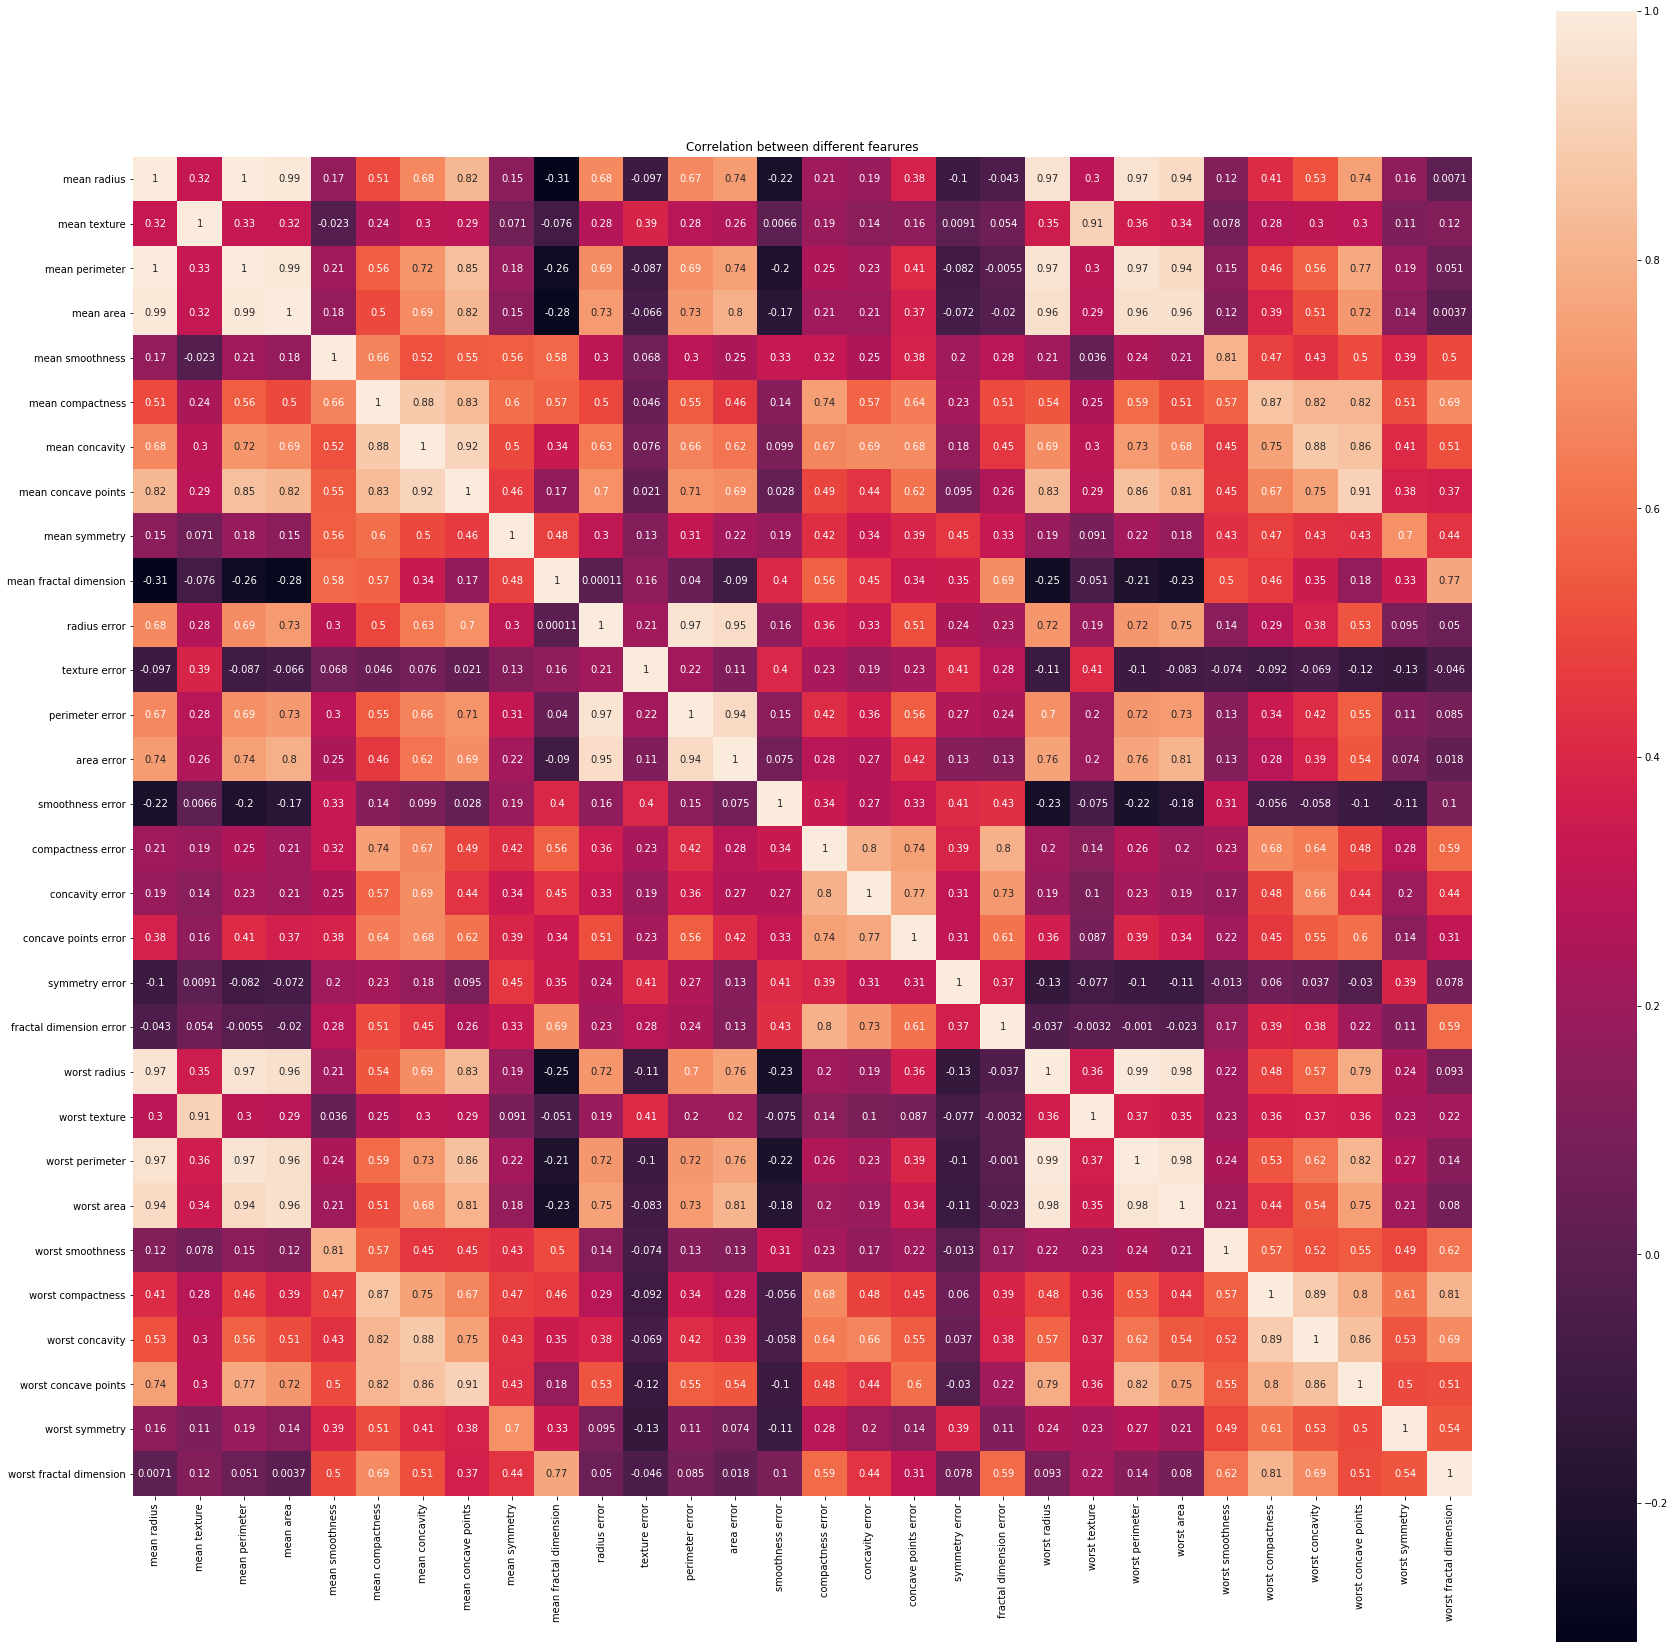

In [25]:
import seaborn as sns
correlation = x.corr()
plt.figure(figsize=(30,30))
sns.heatmap(correlation, vmax=1, square=True,annot=True)

plt.title('Correlation between different fearures')

Since we have imported data from standard sklearn we will not face much complex in data So not much concentrating on data preprocessing we will move into PCA

#  Model Implementation with PCA

#  PCA

Center the data

In [40]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

Creating PCA object

In [55]:
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
x_pca=pca.fit_transform(x_scaled)

In [53]:
print('Before PCA',x.shape)
print('After PCA',x_pca.shape)

Before PCA (569, 30)
After PCA (569, 3)


Initially we have 30 features by pca pca we have reduced it into 5 features. 

Model implementation with PCA features

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

#Splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.3,random_state=1234,stratify=y)

rm = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
rm.fit(x_train, y_train)

rm_prd = rm.predict(x_test)

print("Accuracy is {0:.2f}".format(accuracy_score(y_test, rm_prd)))
print("Precision is {0:.2f}".format(precision_score(y_test, rm_prd)))
print("Recall is {0:.2f}".format(recall_score(y_test, rm_prd)))

accuracy_rm = accuracy_score(y_test, rm_prd)
precision_rm = precision_score(y_test, rm_prd)
recall_rm = recall_score(y_test, rm_prd)

Accuracy is 0.96
Precision is 0.94
Recall is 1.00


#  Choosing the number of components

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components.

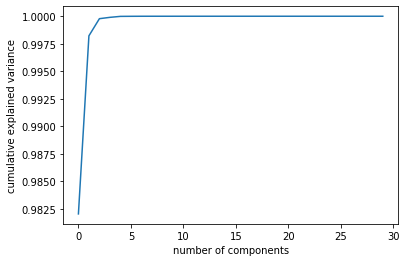

In [39]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This the bassic implementation pca to understand the concept. Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations. 